## CNN에서 output size 계산

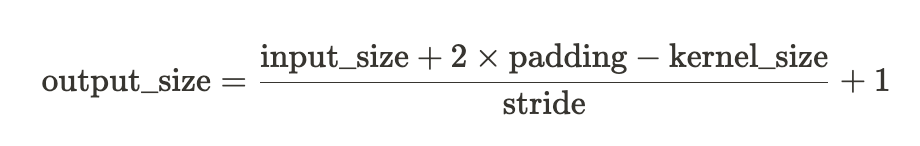

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)
print(f'텐서의 크기 : {inputs.shape}')

텐서의 크기 : torch.Size([1, 1, 28, 28])


- stride는 default로 stride=(1, 1)

In [ ]:
# 첫번째 Conv2D
conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1, stride=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
# 두번째 Conv2D
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
# 맥스 풀링
pool = nn.MaxPool2d(kernel_size=2) # 2 -> Kernel_size, default로 stride는 kernel_size와 동일, padding은 0
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
print(inputs.shape)
# 연결하여 모델 만들기
# (28 - 3 + 2*1)/1 + 1 / 1 -> 28
out = conv1(inputs)
print(out.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 32, 28, 28])


In [ ]:
# (28 - 2)/2 + 1 = 14
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
# 두번째 Conv2D 통과
# (14 - 3 + 2*1)/1 + 1 = 14
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
# (14 - 2)/2 + 1 = 7
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


### ceil_mode

- 입력 크기 7x7, kernel_size=2, stride=2라면:

- ceil_mode=False → 출력: 3x3 (7/2 = 3.5 → floor → 3)

- ceil_mode=True → 출력: 4x4 (7/2 = 3.5 → ceil → 4)

In [ ]:
out.size(0), out.size(1), out.size(2), out.size(3)

(1, 64, 7, 7)

In [ ]:
out.size()

torch.Size([1, 64, 7, 7])

In [ ]:
out.shape

torch.Size([1, 64, 7, 7])

In [ ]:
# nn.Flatten() 사용
flatten_layer = nn.Flatten()
out = flatten_layer(out)
print(out.shape)  # [1, 64x7x7] -> [1, 3136]

torch.Size([1, 3136])


In [ ]:
# view()를 사용
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라
# [1, 64*7*7]
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

torch.Size([1, 10])
